In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import pickle
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)

cd = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

X

In [3]:
cd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
cd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
cd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [6]:
cd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
cd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [9]:
cd.shape

(303, 14)

In [10]:
# Define a dictionary to fill null values in different columns
cd= cd.fillna({
    'ca': cd['ca'].median(),
    'thal': cd['thal'].median(),              # Median for both values
})


In [11]:
cd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
cd_X=cd.drop(columns='num')
cd_Y= cd['num']

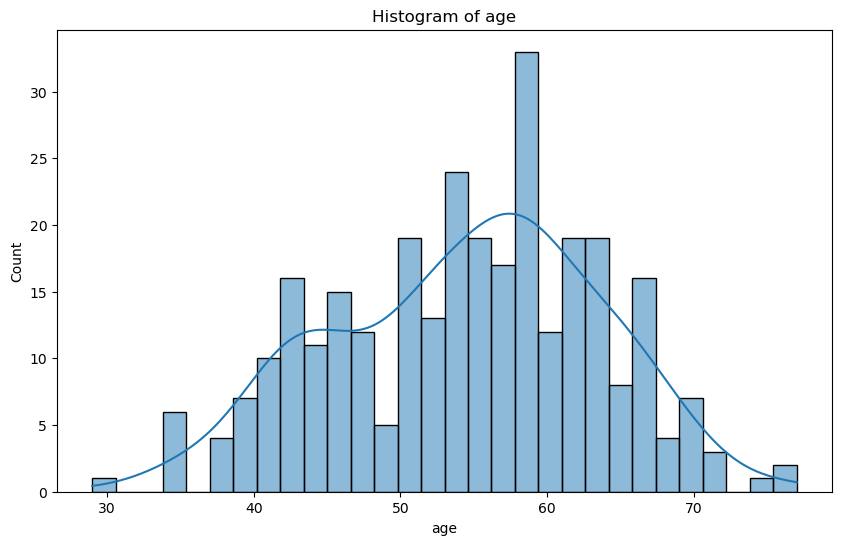

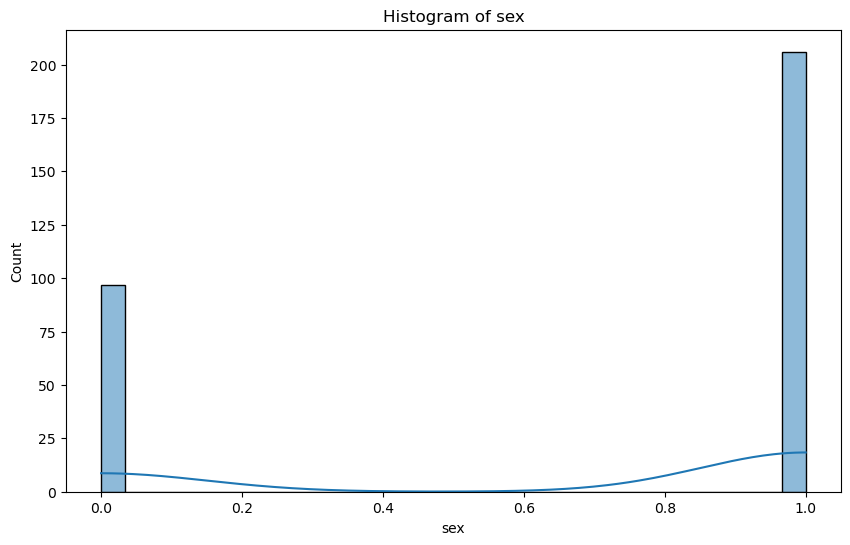

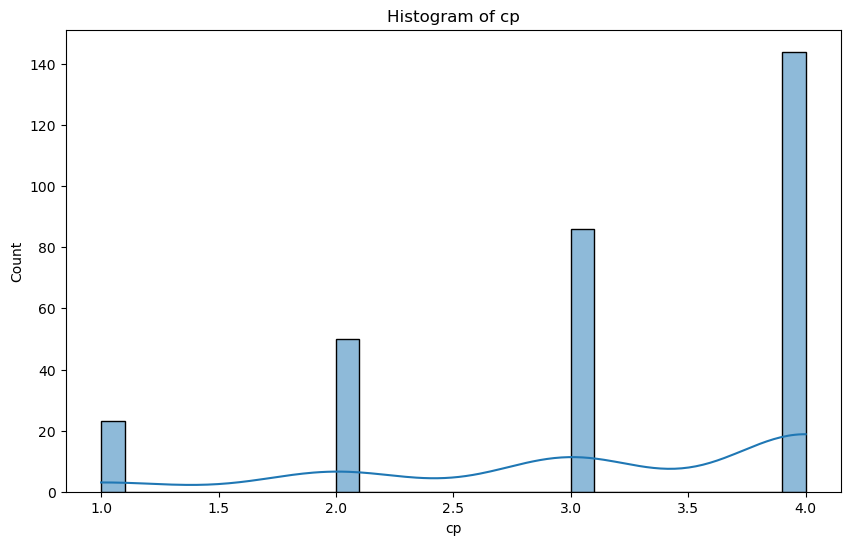

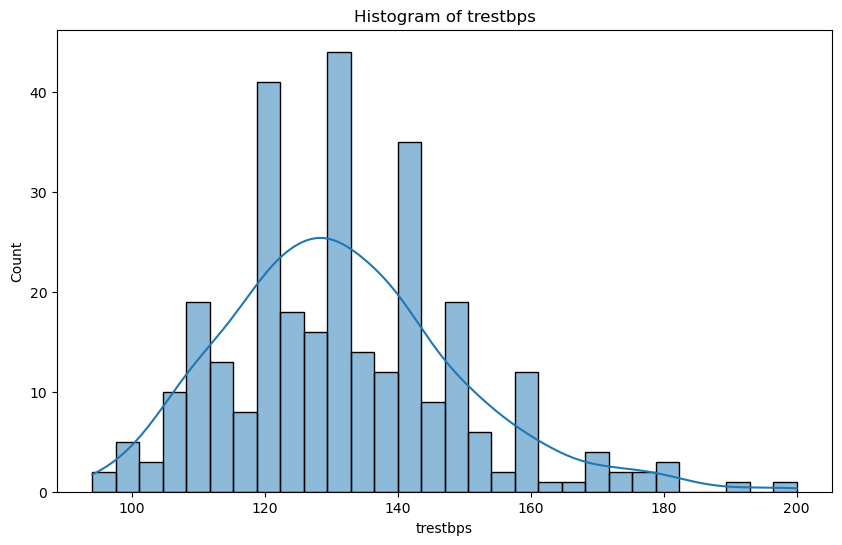

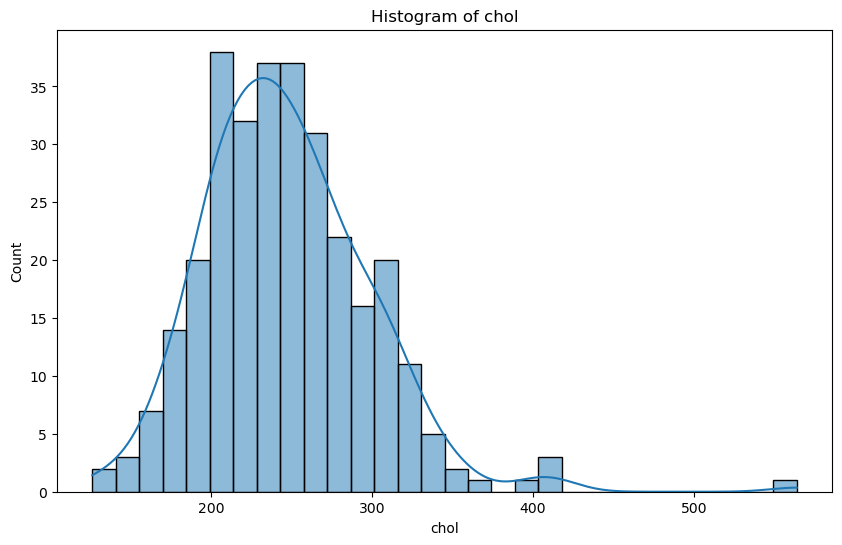

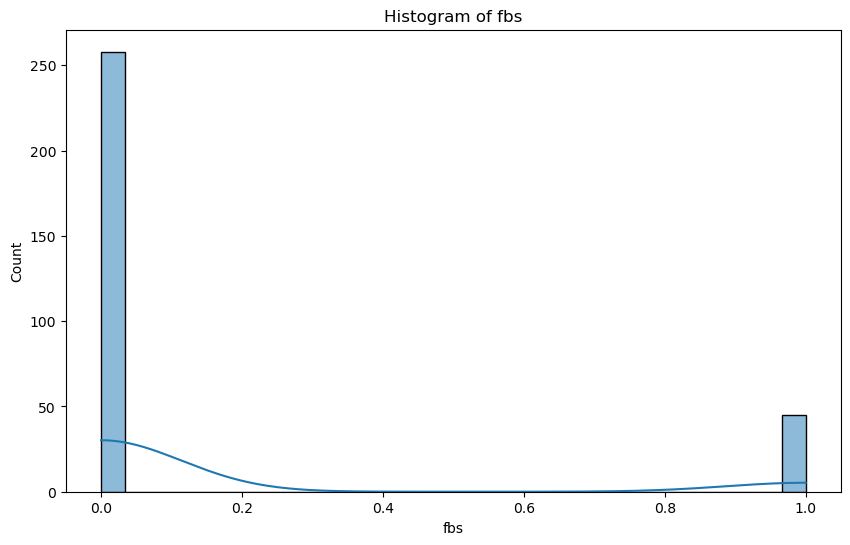

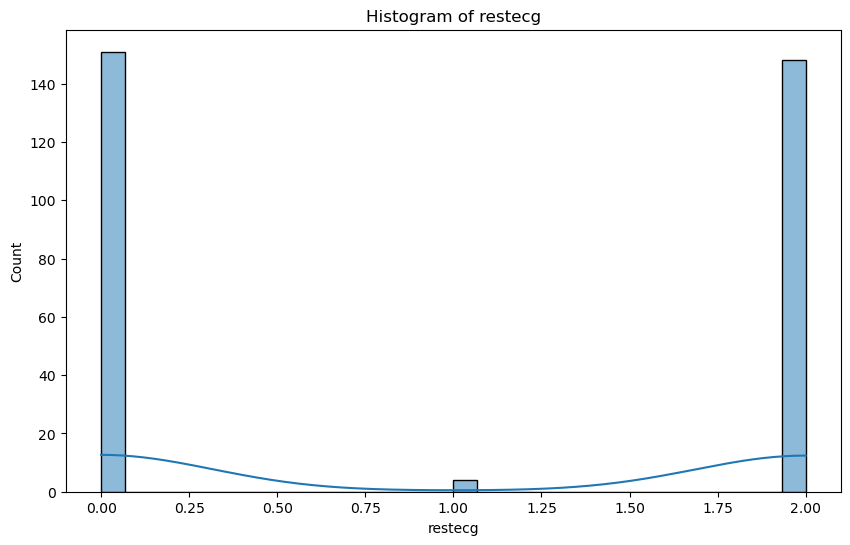

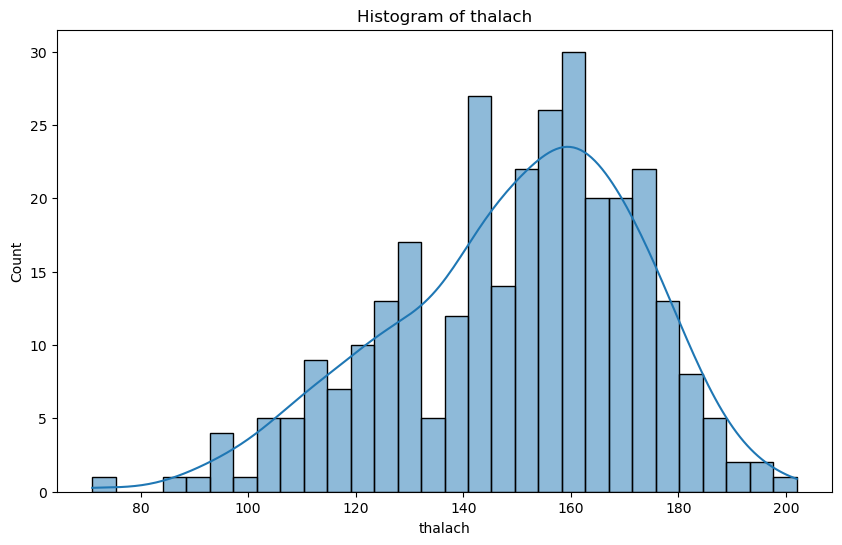

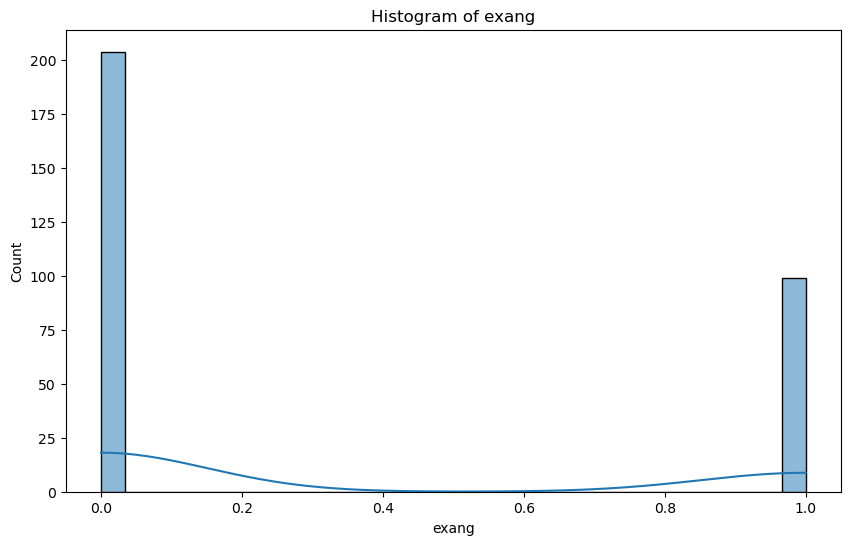

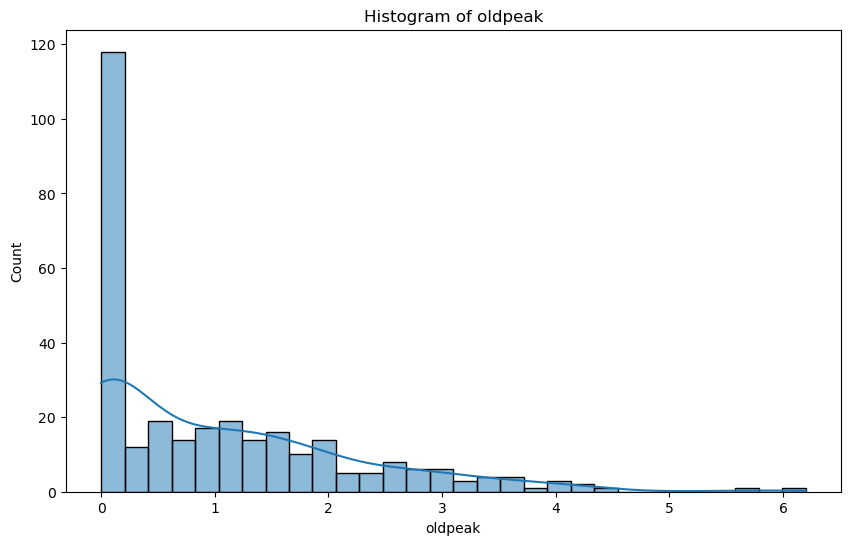

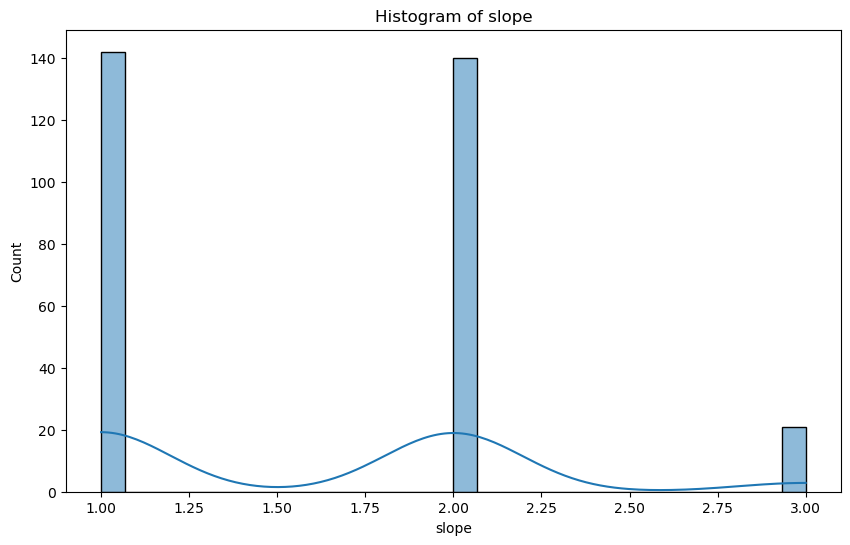

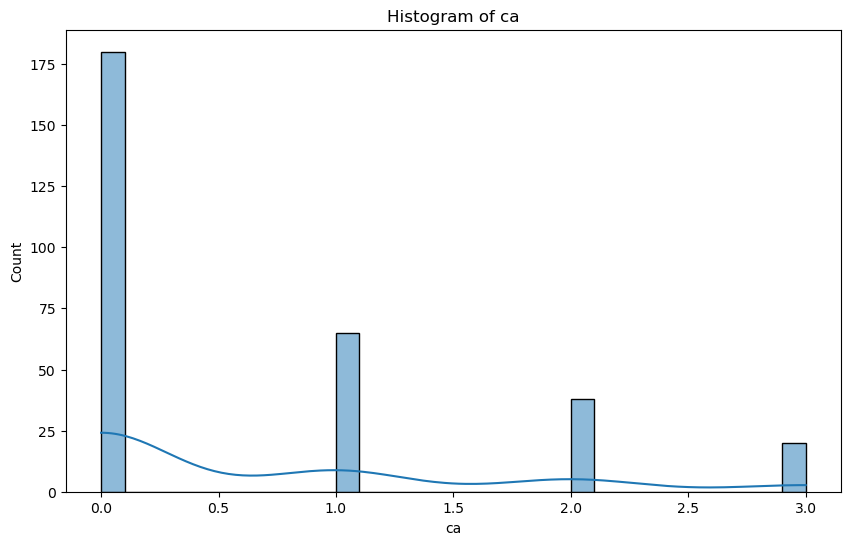

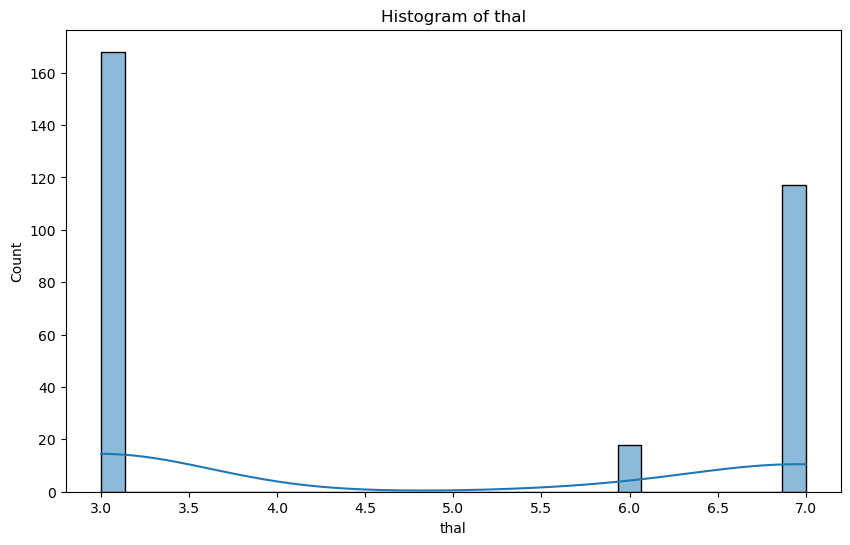

In [13]:
for column in cd_X:
    plt.figure(figsize=(10,6))
    sns.histplot(cd_X[column],bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


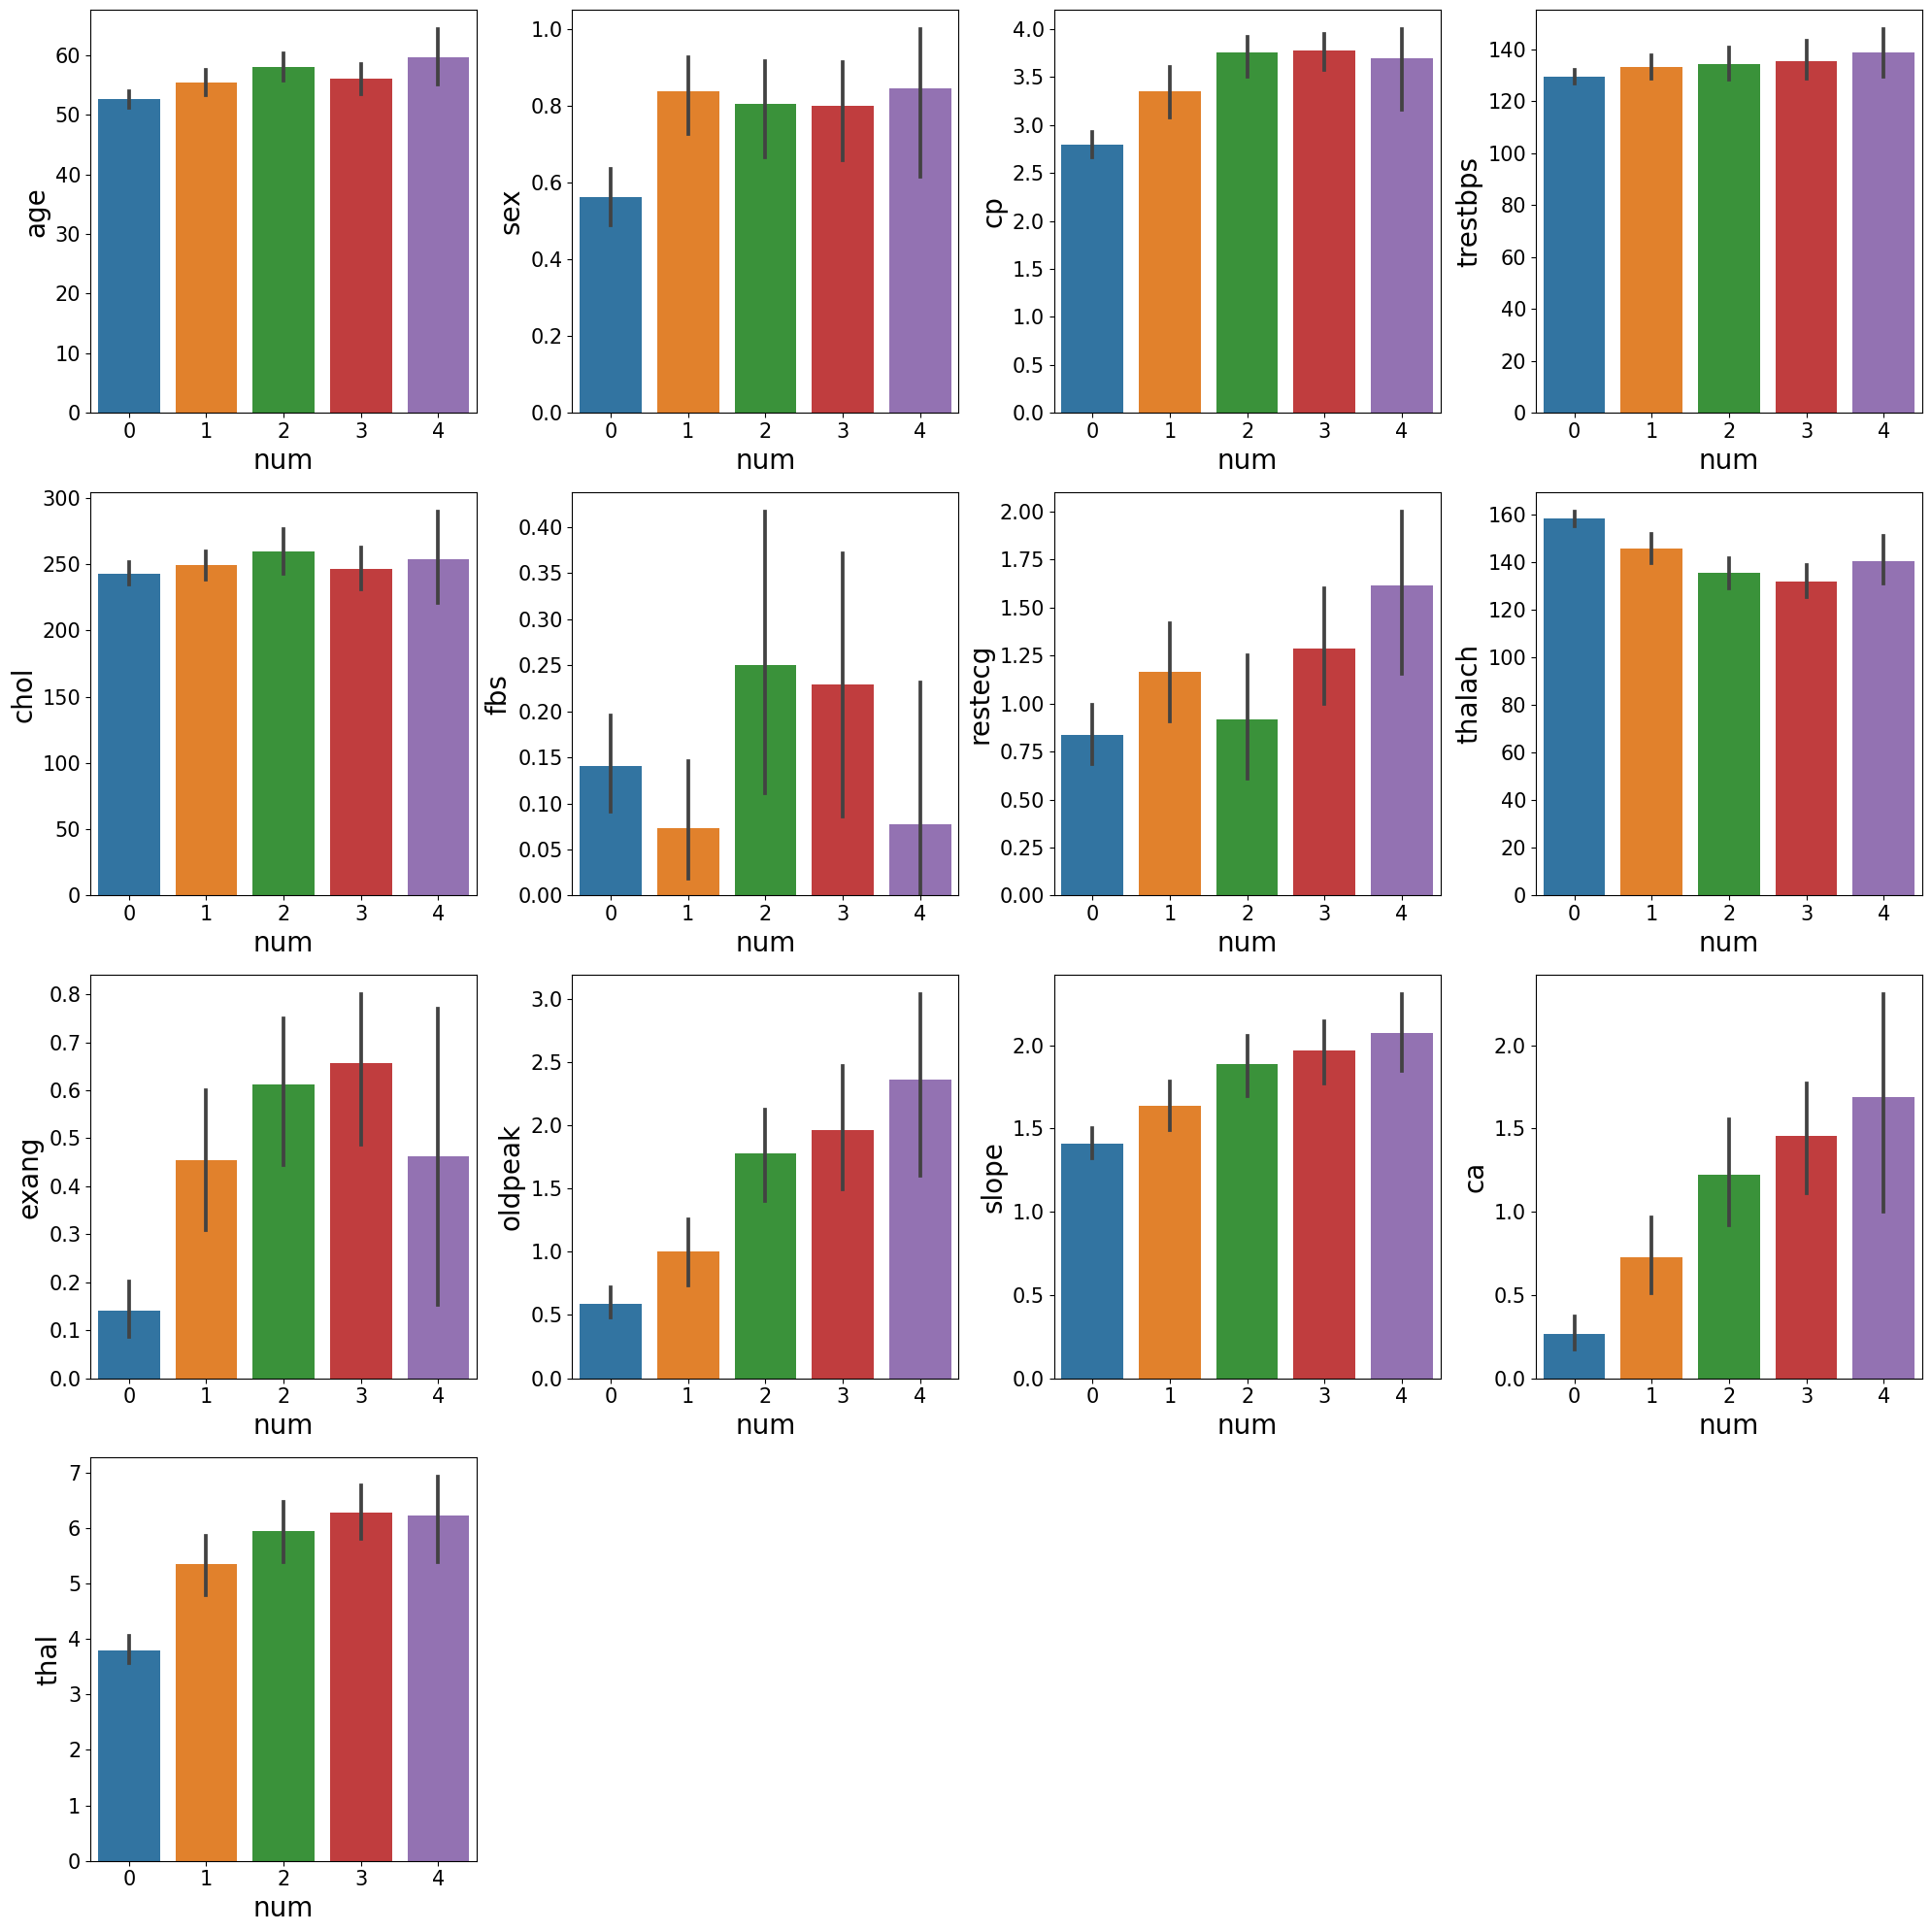

In [14]:
# Assuming cp is a DataFrame and you want to plot multiple barplots
cd_columns = cd_X.columns  # Get all columns from cp

num_plots = len(cd_columns)  # Determine how many plots you need
rows = 4
cols = 4

# Ensure we don't try to create more subplots than the grid can handle
num_subplots = min(num_plots, rows * cols)

# Create a figure and iterate over the columns to plot
fig = plt.figure(figsize=(20, 20))  # Adjust size as needed
for i in range(num_subplots):
    ax = fig.add_subplot(rows, cols, i+1)  # i+1 because subplot indexes start from 1
    sns.barplot(x=cd_Y, y=cd[cd_columns[i]], ax=ax)
    ax.set_xlabel('num', fontsize=20)
    ax.set_ylabel(cd_columns[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()  # Ensure tight layout to prevent overlap
plt.show()


cd.plot(kind='box',figsize=(20,10))

<Axes: >

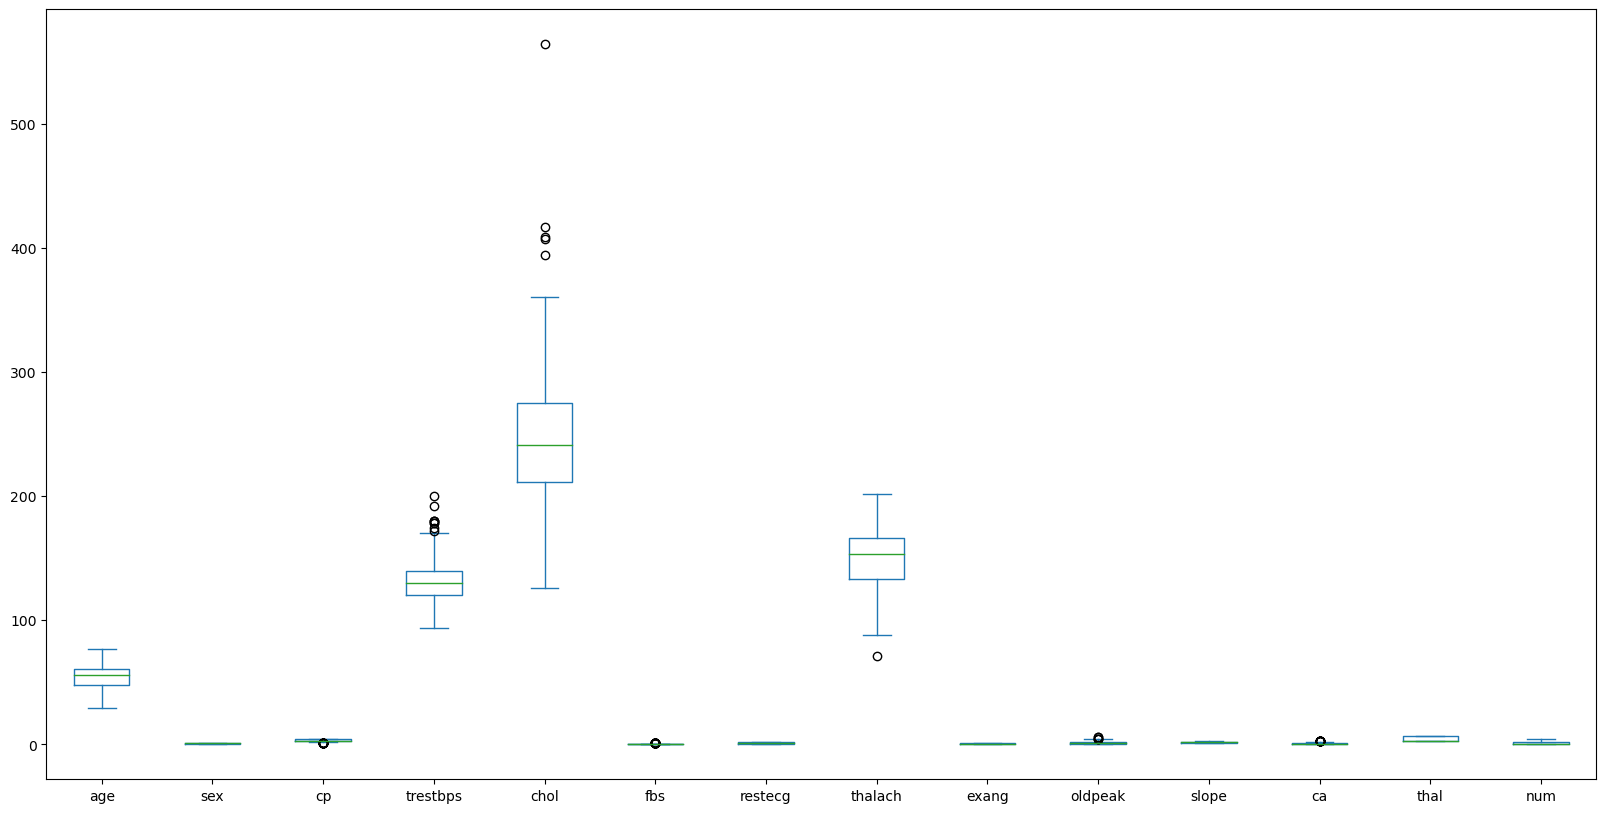

In [15]:
cd.plot(kind='box',figsize=(20,10))

<Axes: xlabel='chol'>

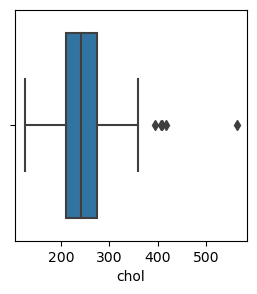

In [16]:
plt.figure(figsize=(3,3))
sns.boxplot(data=cd, x= 'chol')

In [17]:
from scipy.stats import zscore

# Calculate z-scores for the numerical column
z_scores = zscore(cd['chol'])

threshold = 3  # Adjust as needed.
outliers_z = cd[abs(z_scores) > threshold]


In [18]:
percentage_outliers_z = (len(outliers_z) / len(cd)) * 100
print(f"Percentage of outliers in (chol): {percentage_outliers_z:.2f}%")

Percentage of outliers in (chol): 1.32%


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(cd_X, cd_Y)

ExtraTreesRegressor()

In [20]:
print(selection.feature_importances_)

[0.05391746 0.02314997 0.09787085 0.05184958 0.04616835 0.02080484
 0.02633233 0.06319647 0.06606477 0.09744142 0.05044472 0.16124383
 0.24151543]


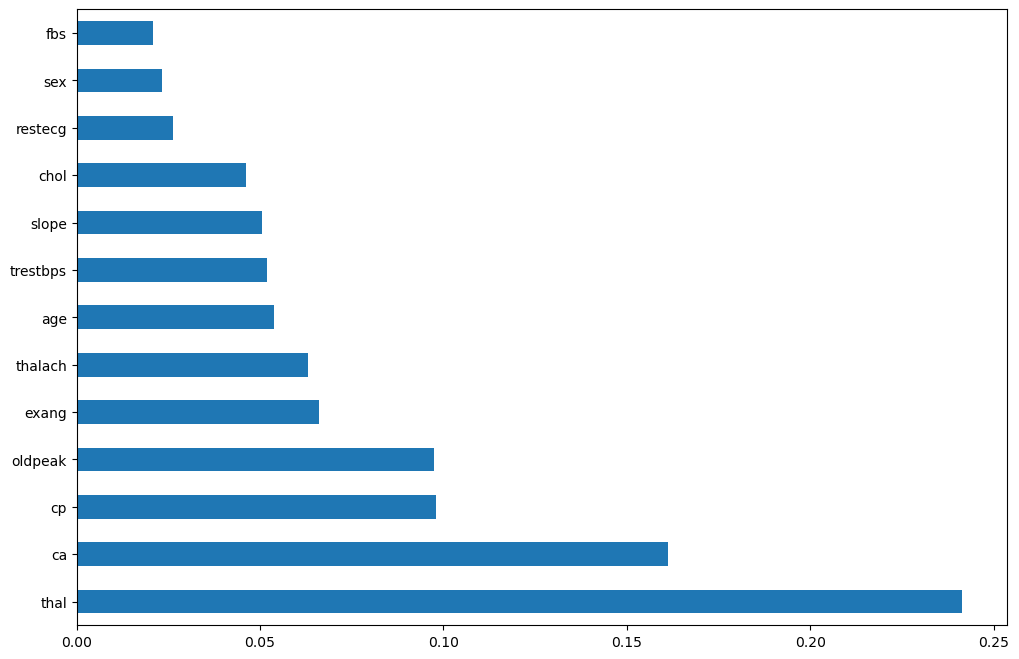

In [21]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=cd_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [22]:
X = cd_X.drop(columns=['fbs', 'restecg'])
y= cd_Y

In [23]:
X

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,174,0,0.0,2,1.0,3.0


In [24]:
y.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler (or MinMaxScaler)
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_Train)

# Only transform the test data (do not fit again)
X_test = scaler.transform(X_Test)


In [27]:


# Convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_train, columns=X.columns)

# Now you can view the scaled columns
print(X_scaled_df)  # To view the first few rows


          age  sex        cp  trestbps      chol   thalach  exang   oldpeak  \
0    0.000000  1.0  0.333333  0.339623  0.268041  1.000000    0.0  0.000000   
1    0.583333  1.0  0.666667  0.528302  0.000000  0.778626    0.0  0.032258   
2    0.833333  1.0  0.000000  0.622642  0.371134  0.458015    0.0  0.016129   
3    0.750000  0.0  0.666667  0.622642  0.804124  0.610687    0.0  0.129032   
4    0.479167  1.0  1.000000  0.132075  0.367698  0.580153    0.0  0.016129   
..        ...  ...       ...       ...       ...       ...    ...       ...   
237  0.520833  1.0  0.333333  0.924528  0.539519  0.946565    0.0  0.000000   
238  0.791667  1.0  1.000000  0.292453  0.439863  0.702290    0.0  0.032258   
239  0.625000  1.0  1.000000  0.433962  0.175258  0.694656    1.0  0.000000   
240  0.666667  1.0  1.000000  0.433962  0.278351  0.511450    1.0  0.306452   
241  0.583333  0.0  1.000000  0.320755  0.608247  0.671756    0.0  0.000000   

     slope        ca  thal  
0      0.0  0.000000  

In [28]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

X_train,y_train = smote.fit_resample(X_train,y_train)

In [29]:
y_train.value_counts()

num
0    135
3    135
1    135
2    135
4    135
Name: count, dtype: int64

In [30]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform  # For defining distributions for RandomizedSearch
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [31]:

rfc = RandomForestClassifier(random_state=42)
param_rfc = {

    "n_estimators":randint(50,200),
    'max_depth' : randint(10,50),
    'min_samples_split':randint(1,20),
    'min_samples_leaf':randint(1,20),
    'max_features':['auto','sqrt','log2',None],
    'bootstrap':[True,False]
}

randomized_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_rfc, n_iter=30, n_jobs=-1,
                                    cv=10,verbose=1, random_state=42, scoring='accuracy')

randomized_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D31E681F10>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D31D96B350>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D31D96A790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D31CA9E510>},
                   random_state=42, scoring='accuracy', verbose=1)

In [32]:
randomized_rfc.best_params_

{'bootstrap': False,
 'max_depth': 36,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [33]:
best_model_rfc = randomized_rfc.best_estimator_
predict_rfc = best_model_rfc.predict(X_test)
predict_rfc

array([0, 1, 2, 1, 1, 4, 2, 1, 0, 3, 0, 0, 2, 3, 1, 0, 0, 3, 2, 0, 0, 0,
       3, 0, 3, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0], dtype=int64)

Accuracy:
The accuracy of the Random forest Model: 47.540983606557376

Confusion matrix:


<Axes: >

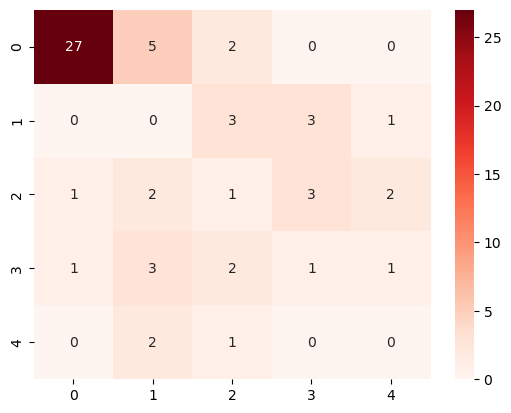

In [34]:
# Accuracy
print('Accuracy:')
accuracy_rfc = accuracy_score(predict_rfc, y_test)
print('The accuracy of the Random forest Model:',accuracy_rfc*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_rfc = confusion_matrix(predict_rfc, y_test)
sns.heatmap(cm_rfc, cmap='Reds', annot=True)

In [35]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)


In [36]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.47540983606557374


In [37]:
# KNN
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.best_estimator_.predict(X_test)


In [38]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.45901639344262296


In [39]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
from sklearn.model_selection import RandomizedSearchCV

param_svm = {
    "C": [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf','poly'],  # Kernel type (removed 'poly' to simplify)
    'gamma': ['scale','auto'],  # Kernel coefficient (removed 'auto' to simplify)
    'degree': [2, 3]  # Degree of polynomial kernel (reduced range)
}
randomized_svm = RandomizedSearchCV(estimator=svm,param_distributions=param_svm,
                                    random_state=42, cv = 3 ,n_jobs=-1,scoring='accuracy')

randomized_svm.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [40]:
best_param_svm = randomized_svm.best_params_

best_param_svm

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 10}

In [41]:
best_model_svm = randomized_svm.best_estimator_
best_model_svm

SVC(C=10, random_state=42)

In [42]:
predict_svm = best_model_svm.predict(X_test)
predict_svm

array([1, 1, 2, 1, 1, 4, 2, 3, 0, 3, 0, 0, 2, 3, 3, 1, 0, 3, 2, 0, 0, 0,
       3, 0, 4, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0, 3, 2, 2, 1, 0, 2, 0, 1, 0,
       0, 4, 0, 0, 2, 1, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0], dtype=int64)

Accuracy:
The accuracy of the Support Vector machine: 50.81967213114754

Confusion matrix:


<Axes: >

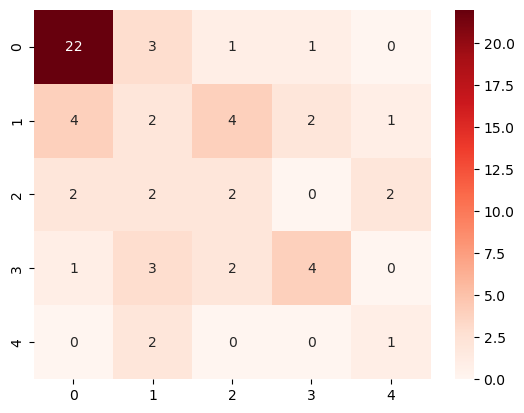

In [43]:
# Accuracy
print('Accuracy:')
accuracy_svm = accuracy_score(predict_svm, y_test)
print('The accuracy of the Support Vector machine:',accuracy_svm*100)
print()

#Confusion Matrix
print("Confusion matrix:")
cm_svm = confusion_matrix(predict_svm, y_test)
sns.heatmap(cm_svm, cmap='Reds', annot=True)

In [47]:
SVM_final = randomized_svm.best_estimator_
filename = 'SVM_Model.pkl'
pickle.dump(SVM_final, open(filename, 'wb'))

# Loading and Testing the Saved Model
loaded_model = pickle.load(open('SVM_Model.pkl', 'rb'))
final_prediction = loaded_model.predict(X_test)